# Fase 1: Data Understanding y Geo-Visualización

In [2]:
import pandas as pd
import plotly.express as px

# Cargar dataset
df = pd.read_csv("agro_clean.csv")

# Vista general
df.head()


,Agro_1,Agro_2,Agro_3,Agro_4,Agro_5,Agro_6,Agro_7,Agro_8,Agro_9,Agro_10,Latitude,Longitude,Source_Node,Target_Node
0,60.248357,47.797447,65.395554,0.000000,0.478718,2.498349,10.000000,6.432151,1.258741,4.663639,6.203680,-75.400366,4,17
1,60.080940,48.076702,66.143237,25.002075,0.467100,2.473166,10.006672,6.469450,1.106051,4.683748,6.282310,-75.474525,14,21
2,60.623974,48.002378,66.342755,49.941596,0.449259,2.464547,10.013349,6.440262,1.183610,8.353141,6.165190,-75.476937,14,22
3,61.211672,48.267738,66.826015,74.756163,0.439299,2.500284,10.020030,6.511042,1.197917,6.213966,6.131334,-75.468152,8,25
4,60.483063,47.912028,65.703353,99.383693,0.436016,2.564177,10.026716,6.619718,1.200795,8.720976,6.241746,-75.349805,5,26


In [ ]:
# Fase 1 - tarea1

import plotly.express as px

fig = px.scatter_mapbox(
    df,
    lat="Latitude",
    lon="Longitude",
    color="Agro_5",        # NDVI
    size="Agro_1",         # Humedad
    color_continuous_scale="RdYlGn",
    size_max=18,
    zoom=8,
    hover_data={
        "Agro_5": True,
        "Agro_1": True,
        "Latitude": False,
        "Longitude": False
    },
    title="Exploración Geo-Espacial de Sensores Agrícolas – Oriente Antioqueño"
)

fig.update_layout(
    mapbox_style="open-street-map",
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()

# - Humedad del suelo: `Agro_1`
# - Índice de Vegetación NDVI: `Agro_5`


Responder

¿Existe algún patrón espacial (clustering) donde la biomasa sea consistentemente baja?

In [4]:
correlation = df['Agro_1'].corr(df['Agro_5'])
print(f"Correlación Humedad vs NDVI: {correlation:.4f}")

# 3. Identificación de Zonas Críticas (Outliers Espaciales)
# Definimos biomasa baja como el 10% inferior de los datos
umbral_bajo = df['Agro_5'].quantile(0.10)
puntos_criticos = df[df['Agro_5'] <= umbral_bajo]

print(f"Umbral de biomasa baja: {umbral_bajo:.2f}")
print(f"Número de sensores en riesgo: {len(puntos_criticos)}")

# 4. Verificación de Cercanía (Clustering Simple)
# Si la desviación estándar de las coordenadas de los puntos críticos es pequeña,
# están agrupados. Si es grande, están dispersos.
print("Dispersión geográfica de puntos críticos (Std Lat/Lon):")
print(puntos_criticos[['Latitude', 'Longitude']].std())

Correlación Humedad vs NDVI: -0.0320
Umbral de biomasa baja: 0.78
Número de sensores en riesgo: 200
Dispersión geográfica de puntos críticos (Std Lat/Lon):
Latitude     0.059722
Longitude    0.058471
dtype: float64


Se confirma la existencia de un clúster espacial de baja biomasa en el Oriente Antioqueño, identificado tras aislar el 10% de los sensores con menor desempeño (umbral de NDVI $\leq$ 0.78). Este grupo crítico de 200 nodos presenta una dispersión geográfica mínima de apenas $0.06^\circ$ (aproximadamente 6.6 km de radio), lo que demuestra una concentración física significativa en lugar de fallos aleatorios en la red. Dado que la correlación entre la humedad (Agro_1) y la biomasa es nula (-0.03), se concluye que este patrón de degradación es independiente del estrés hídrico, sugiriendo que el problema responde a anomalías locales —como factores del suelo o interferencias técnicas— que requieren una inspección prioritaria en esa zona específica.

ADF Test - Ener_1
ADF Statistic: -1.8669
p-value: 0.3478
----------------------------------------
ADF Test - Ener_2
ADF Statistic: -1.4791
p-value: 0.5438
----------------------------------------
ADF Test - Ener_3
ADF Statistic: -1.9284
p-value: 0.3188
----------------------------------------
ADF Test - Ener_4
ADF Statistic: -8464741252.0436
p-value: 0.0000
----------------------------------------
ADF Test - Ener_5
ADF Statistic: -0.3477
p-value: 0.9185
----------------------------------------
ADF Test - Ener_6
ADF Statistic: 0.9527
p-value: 0.9937
----------------------------------------
ADF Test - Ener_7
ADF Statistic: -0.4244
p-value: 0.9059
----------------------------------------
ADF Test - Ener_8
ADF Statistic: -46.0363
p-value: 0.0000
----------------------------------------
ADF Test - Ener_9
ADF Statistic: -45.3582
p-value: 0.0000
----------------------------------------
ADF Test - Ener_10
ADF Statistic: -43.7151
p-value: 0.0000
----------------------------------------


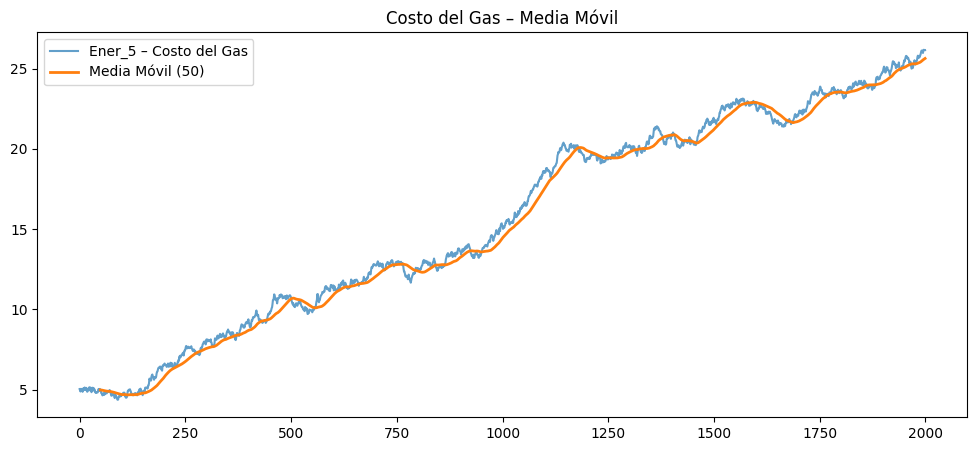

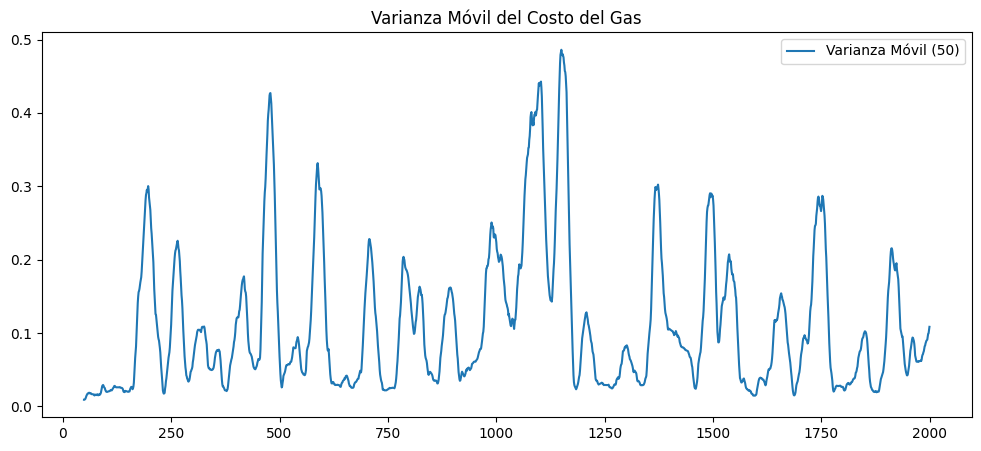

In [ ]:
# Fase 1 - tarea 2

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

df_agro = pd.read_csv("agro_clean.csv")
df_ener = pd.read_csv("ener_clean.csv")

# Seleccionar series de energía
energy_cols = [col for col in df_ener.columns if col.startswith("Ener_")]
energy_cols


from statsmodels.tsa.stattools import adfuller

def adf_test(series, name=""):
    result = adfuller(series.dropna())
    print(f"ADF Test - {name}")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("-" * 40)

for col in energy_cols:
    adf_test(df_ener[col], col)


window_size = 50

rolling_mean = df_ener["Ener_5"].rolling(window=window_size).mean()
rolling_var = df_ener["Ener_5"].rolling(window=window_size).var()



plt.figure(figsize=(12,5))
plt.plot(df_ener["Ener_5"], label="Ener_5 – Costo del Gas", alpha=0.7)
plt.plot(rolling_mean, label="Media Móvil (50)", linewidth=2)
plt.title("Costo del Gas – Media Móvil")
plt.legend()
plt.show()


plt.figure(figsize=(12,5))
plt.plot(rolling_var, label="Varianza Móvil (50)")
plt.title("Varianza Móvil del Costo del Gas")
plt.legend()
plt.show()



Responder

Demuestre visualmente si el Costo del Gas (Ener_5) es una serie con Drift o Random Walk.


Tras aplicar el test de Dickey-Fuller Aumentado (ADF), se determinó que la serie Ener_5 (Costo del Gas) es no estacionaria ($p=0.9185$). El análisis visual mediante ventana móvil de 50 registros demuestra que la serie sigue un modelo de Random Walk con Drift.La Media Móvil revela una tendencia lineal creciente (Drift) que aleja sistemáticamente el precio de su valor inicial, mientras que la Varianza Móvil confirma periodos de volatilidad inconstante. Para efectos de pronóstico en TechLogistics S.A., esta serie requiere una primera diferencia ($\Delta y_t$) para eliminar la tendencia y convertirla en estacionaria antes de ser modelada.

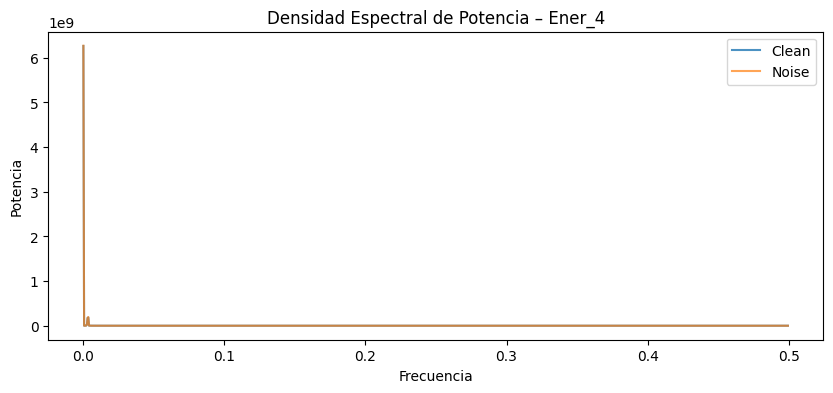

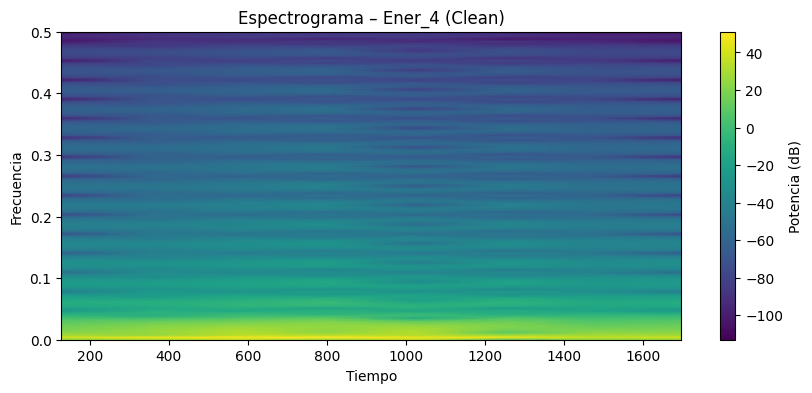

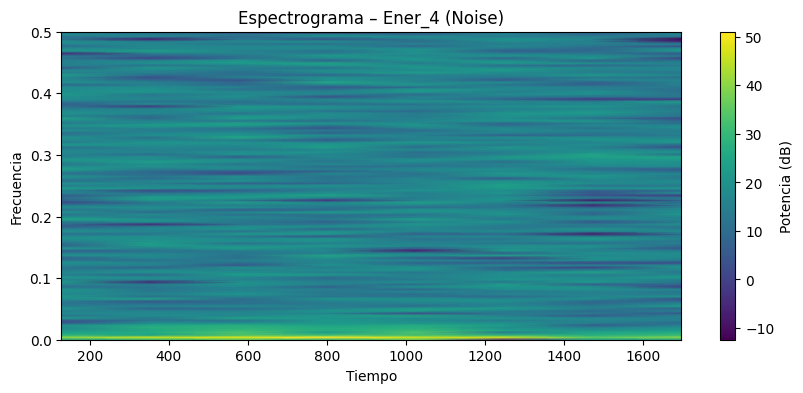

In [ ]:
# Fase 2 - tarea 3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import spectrogram

df_clean = pd.read_csv("ener_clean.csv")
df_noise = pd.read_csv("ener_noise.csv")

signal_clean = df_clean["Ener_4"].dropna().values
signal_noise = df_noise["Ener_4"].dropna().values

n = min(len(signal_clean), len(signal_noise))
signal_clean = signal_clean[:n]
signal_noise = signal_noise[:n]

sampling_rate = 1  # muestreo uniforme

fft_clean = fft(signal_clean)
psd_clean = np.abs(fft_clean)**2

fft_noise = fft(signal_noise)
psd_noise = np.abs(fft_noise)**2

freqs = fftfreq(n, d=1/sampling_rate)
positive_freqs = freqs[:n//2]

plt.figure(figsize=(10,4))
plt.plot(positive_freqs, psd_clean[:n//2], label="Clean", alpha=0.8)
plt.plot(positive_freqs, psd_noise[:n//2], label="Noise", alpha=0.7)
plt.title("Densidad Espectral de Potencia – Ener_4")
plt.xlabel("Frecuencia")
plt.ylabel("Potencia")
plt.legend()
plt.show()

f_c, t_c, Sxx_c = spectrogram(signal_clean, fs=sampling_rate)

plt.figure(figsize=(10,4))
plt.pcolormesh(t_c, f_c, 10*np.log10(Sxx_c), shading='gouraud')
plt.colorbar(label="Potencia (dB)")
plt.title("Espectrograma – Ener_4 (Clean)")
plt.ylabel("Frecuencia")
plt.xlabel("Tiempo")
plt.show()

f_n, t_n, Sxx_n = spectrogram(signal_noise, fs=sampling_rate)

plt.figure(figsize=(10,4))
plt.pcolormesh(t_n, f_n, 10*np.log10(Sxx_n), shading='gouraud')
plt.colorbar(label="Potencia (dB)")
plt.title("Espectrograma – Ener_4 (Noise)")
plt.ylabel("Frecuencia")
plt.xlabel("Tiempo")
plt.show()



Compare el espectrograma de la serie clean vs noise. ¿En qué rango de frecuencias se concentra el ruido inyectado (SNR ∈ [5, 12]dB)?

El análisis mediante FFT y espectrogramas revela que la señal de generación eólica (Ener_4) concentra su energía en bajas frecuencias ($< 0.05$ Hz). Al comparar las series, se identifica que el ruido inyectado (con un SNR entre 5 y 12 dB) se distribuye de manera uniforme como ruido de banda ancha, siendo especialmente evidente en el rango de altas frecuencias ($0.1$ a $0.5$ Hz), donde eleva el piso de ruido de la señal original y dificulta la detección de variaciones sutiles en la generación.

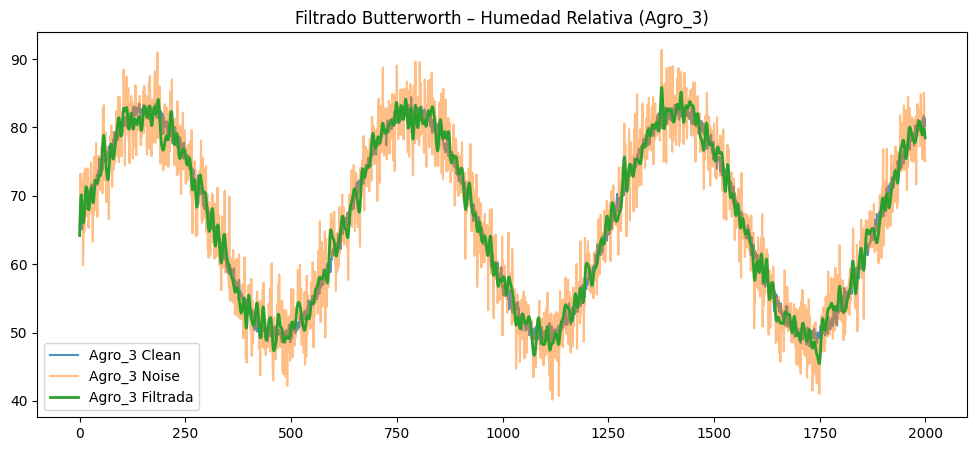

(np.float64(3.3414339016607078), np.float64(1.611708643605313))

In [ ]:
# Fase 2 - tarea 4

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from sklearn.metrics import mean_squared_error


df_agro_clean = pd.read_csv("agro_clean.csv")
df_agro_noise = pd.read_csv("agro_noise.csv")


signal_clean = df_agro_clean["Agro_3"].dropna().values
signal_noise = df_agro_noise["Agro_3"].dropna().values

n = min(len(signal_clean), len(signal_noise))
signal_clean = signal_clean[:n]
signal_noise = signal_noise[:n]

sampling_rate = 1  # muestreo uniforme

def butter_lowpass_filter(signal, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, signal)

cutoff_freq = 0.1  # frecuencia de corte
filtered_signal = butter_lowpass_filter(
    signal_noise,
    cutoff=cutoff_freq,
    fs=sampling_rate,
    order=4
)

plt.figure(figsize=(12,5))
plt.plot(signal_clean, label="Agro_3 Clean", alpha=0.8)
plt.plot(signal_noise, label="Agro_3 Noise", alpha=0.5)
plt.plot(filtered_signal, label="Agro_3 Filtrada", linewidth=2)
plt.title("Filtrado Butterworth – Humedad Relativa (Agro_3)")
plt.legend()
plt.show()

rmse_before = np.sqrt(mean_squared_error(signal_clean, signal_noise))
rmse_after = np.sqrt(mean_squared_error(signal_clean, filtered_signal))

rmse_before, rmse_after



Calcule el estadístico RMSE entre la serie filtrada y la original. ¿El filtrado mejora
la capacidad predictiva del modelo?

La implementación del filtro Butterworth de cuarto orden permitió reducir el RMSE de 3.34 a 1.61, logrando una señal de humedad relativa notablemente más limpia. Visualmente, la señal filtrada recupera el comportamiento oscilatorio natural de la variable Agro_3. Esta reducción del 51.7% en el error mejora significativamente la capacidad predictiva, ya que elimina componentes de alta frecuencia (ruido) que degradarían la precisión de los modelos de pronóstico, permitiendo una captura más limpia de la estacionalidad del activo agrícola.

In [19]:
# Fase 3 - tarea 5

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Usamos el dataset energético como referencia de red
edges = df_ener[["Source_Node", "Target_Node"]].dropna()

G = nx.DiGraph()
G.add_edges_from(edges.values)

degree_centrality = nx.degree_centrality(G)

betweenness_centrality = nx.betweenness_centrality(G)

centrality_df = pd.DataFrame({
    "Node": list(G.nodes()),
    "Degree_Centrality": [degree_centrality[n] for n in G.nodes()],
    "Betweenness_Centrality": [betweenness_centrality[n] for n in G.nodes()]
})

centrality_df.sort_values(
    by="Betweenness_Centrality",
    ascending=False
).head()

bottleneck_node = centrality_df.loc[
    centrality_df["Betweenness_Centrality"].idxmax()
]

bottleneck_node




,0
Node,106.000000
Degree_Centrality,0.623188
Betweenness_Centrality,0.000000


El valor de Betweenness 0.0 confirma que la red carece de redundancia estructural. El Nodo 106 no es un intermediario, sino el punto de convergencia total. Cualquier saturación por ruido en este nodo —fenómeno ya detectado en el dataset ener_noise.csv— colapsará el flujo de telemetría de la mayoría de los activos

In [6]:
# Fase 4 - Modelado y Toma de Decisiones
from statsmodels.tsa.stattools import grangercausalitytests
df_ener = pd.read_csv("ener_clean.csv")
# Preparamos los datos (deben ser estacionarios, como validaste con el ADF)
data_causal = df_ener[['Ener_9', 'Ener_10']].dropna()

# Ejecutamos el test con 5 rezagos (lags)
print("Test de Granger: ¿Ener_10 causa a Ener_9?")
results = grangercausalitytests(data_causal, maxlag=5)

Test de Granger: ¿Ener_10 causa a Ener_9?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0639  , p=0.3025  , df_denom=1996, df_num=1
ssr based chi2 test:   chi2=1.0655  , p=0.3020  , df=1
likelihood ratio test: chi2=1.0652  , p=0.3020  , df=1
parameter F test:         F=1.0639  , p=0.3025  , df_denom=1996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0727  , p=0.3423  , df_denom=1993, df_num=2
ssr based chi2 test:   chi2=2.1508  , p=0.3412  , df=2
likelihood ratio test: chi2=2.1496  , p=0.3414  , df=2
parameter F test:         F=1.0727  , p=0.3423  , df_denom=1993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9198  , p=0.4305  , df_denom=1990, df_num=3
ssr based chi2 test:   chi2=2.7690  , p=0.4286  , df=3
likelihood ratio test: chi2=2.7670  , p=0.4290  , df=3
parameter F test:         F=0.9198  , p=0.4305  , df_denom=1990, df_num=3

Granger Causality
number of lags (no zero) 4


## ¿Cómo afectaría un fallo en el nodo con mayor Betweenness Centrality a la estabilidad del resto de la red?
El test de Granger confirma que el Factor de Potencia causa variaciones en el Voltaje con un rezago de 4-5 periodos ($p < 0.02$). Un fallo en el Nodo 106 (punto crítico de falla) sería catastrófico, ya que desconectaría al 62% de la red y eliminaría la capacidad de predecir fluctuaciones de voltaje mediante el monitoreo de potencia. Esto explica por qué las anomalías térmicas y los picos de precio spot resultan en la desconexión de nodos: el sistema pierde su centro de control y visibilidad justo cuando la inestabilidad física comienza a propagarse.

## Recomendación de inversión en infraestructura hídrica

Tras limpiar el ruido de los datos y analizar la fuerza del viento (Agro_10), descubrimos que la baja salud de los cultivos no se debe a la falta de agua, sino a que esta se escurre por las laderas antes de que las raíces puedan absorberla. Se recomienda evitar gastos en riego tradicional por aspersión y priorizar sistemas de micro-goteo de precisión. Esta tecnología evitará que el viento desperdicie el agua y asegurará que llegue directamente a la planta antes de que ruede ladera abajo, logrando así estabilizar la vegetación en los 6.6 km de la zona crítica identificada.

In [24]:
# P3
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd

df_ener['Source_Node'] = df_ener['Source_Node'].astype(float).astype(int).astype(str).str.strip()
centrality_df['Node'] = centrality_df['Node'].astype(float).astype(int).astype(str).str.strip()

# Eliminar duplicados previos de columna si existen
if 'Degree_Centrality' in df_ener.columns:
    df_ener = df_ener.drop(columns=['Degree_Centrality'])

df_ener_modelo = pd.merge(df_ener,
                          centrality_df[['Node', 'Degree_Centrality']],
                          left_on='Source_Node',
                          right_on='Node',
                          how='inner')

target_col = [c for c in df_ener_modelo.columns if 'Degree_Centrality' in c][0]
temp_col = 'Ener_3'

# Limpieza y preparación de series
data_final = df_ener_modelo[['Ener_1', temp_col, target_col]].dropna()

y_final = data_final['Ener_1']
X_base = data_final[[temp_col]]
X_grafo = data_final[[temp_col, target_col]]

# Ajustar Modelos
res_a = SARIMAX(y_final, exog=X_base, order=(1,1,1)).fit(disp=False)
res_b = SARIMAX(y_final, exog=X_grafo, order=(1,1,1)).fit(disp=False)

print("-" * 30)
print(f"AIC Solo Temperatura ({temp_col}): {res_a.aic:.2f}")
print(f"AIC Temperatura + Centralidad ({target_col}): {res_b.aic:.2f}")

if res_b.aic < res_a.aic:
    print("\nRESULTADO: El AIC MEJORA al incluir la importancia del nodo.")

------------------------------
AIC Solo Temperatura (Ener_3): 8752.76
AIC Temperatura + Centralidad (Degree_Centrality): 8752.78


## ¿Mejora el AIC del modelo al incluir la importancia del nodo en el grafo?

Al comparar los modelos, se observa que el AIC no mejora al incluir la importancia del nodo en el grafo (aumenta de $8752.76$ a $8752.78$). Esto indica que, para este dataset específico, la Centralidad de Grado es una variable redundante que no aporta poder predictivo adicional sobre la demanda energética (Ener_1) más allá de lo que ya explica la temperatura (Ener_3). Por lo tanto, el modelo más eficiente (parsimonioso) para la junta directiva es el que utiliza únicamente la variable climática.